<h1 style='background:#00091c; border:0;'><center style='color:#00cdff'>Análise e Classificação</center><center style='color:white'>de Laudos</center></h1> 

 # **<span style="color:##00cdff;">ÍNDICE</span>**

**IMPORTANDO BIBLIOTECAS**

**CARREGANDO OS DADOS**

**PRÉ-PROCESSANDO OS DADOS**

**ANÁLISE DOS DADOS**

**CRIAÇÃO DO MODELO**

**CONCLUSÕES**

 # **<span style="color:##00cdff;">IMPORTANDO BIBLIOTECAS</span>**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import ENGLISH_CONNECTOR_WORDS
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
import matplotlib.colors as mcolors

In [2]:
stopwords = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

 # **<span style="color:##00cdff;">CARREGANDO OS DADOS</span>**

In [3]:
data = pd.read_csv("sample_laudos.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   docid           5000 non-null   int64 
 1   modalidade      5000 non-null   object
 2   tipo_exame      5000 non-null   object
 3   laudo_completo  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [5]:
data.head()

,docid,modalidade,tipo_exame,laudo_completo
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: \n o estudo tomográfico computadoriza...
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...


 # **<span style="color:##00cdff;">ANÁLISE DOS DADOS</span>**
 
Os dados são laudos médicos derivados de tomografias, radiografias e etc. Alguns laudos descrevem uma patologia encontrada no exame e outros não encontraram nenhum tipo de patologia.

O dataser possui 5000 laudos, e possuem as seguintes características:

* **'docid'**: O id pertencente a cada laudo
* **'modalidade'**: A modalidade de cada tipo de exame
* **'tipo_exame'**: o tipo de exame usado
* **'laudo_completo'**: O texto gerado a partir do tipo de exame

In [6]:
data['tipo_exame'].value_counts()

TOMOGRAFIA COMPUTADORIZADA DO TÓRAX                          3977
RADIOGRAFIA DO TÓRAX                                          936
ULTRA-SONOGRAFIA DO TÓRAX                                      27
RADIOGRAFIA DO TORAX PA                                        17
ANGIO-TOMOGRAFIA COMPUTADORIZADA DO TÓRAX (PROTOCOLO TEP)      13
RADIOGRAFIA DO TORAX PA E PERFIL                                9
RESSONÂNCIA MAGNÉTICA DO TÓRAX                                  8
RESSONÂNCIA MAGNÉTICA DO TÓRAX E MEDIASTINO                     6
RADIOGRAFIA DAS COSTELAS POR HEMITÓRAX                          6
RADIOGRAFIA DAS COSTELAS POR HEMITÓRAX  UNILATERAL              1
Name: tipo_exame, dtype: int64

In [7]:
data['modalidade'].value_counts()

CT    3990
CR     969
US      27
MR      14
Name: modalidade, dtype: int64

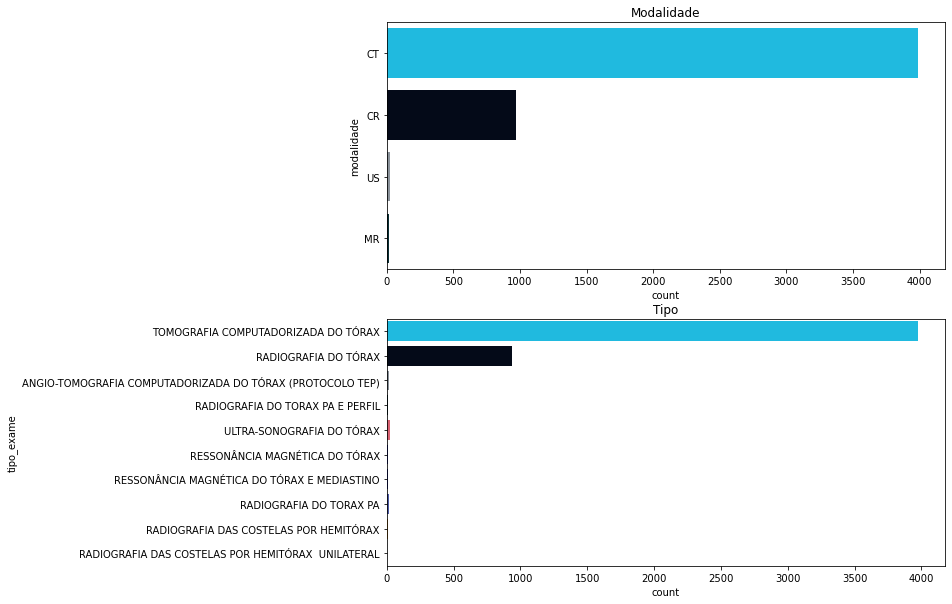

In [8]:
colours=["#00cdff","#00091c", "#87929d", "#03363d", "#ec4d63", "#0310c9", "#0310c9", "#3f51b5", "#ff9800", "#8bc34a"]
#sns.set(rc={'figure.figsize':(11,8.27)})

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.countplot(ax=axes[0], data=data, y="modalidade", palette=colours)
axes[0].set_title("Modalidade")

sns.countplot(ax=axes[1], data=data, y="tipo_exame", palette=colours)
axes[1].set_title("Tipo")

plt.show()

In [9]:
text = ' '.join(data['laudo_completo'].tolist())

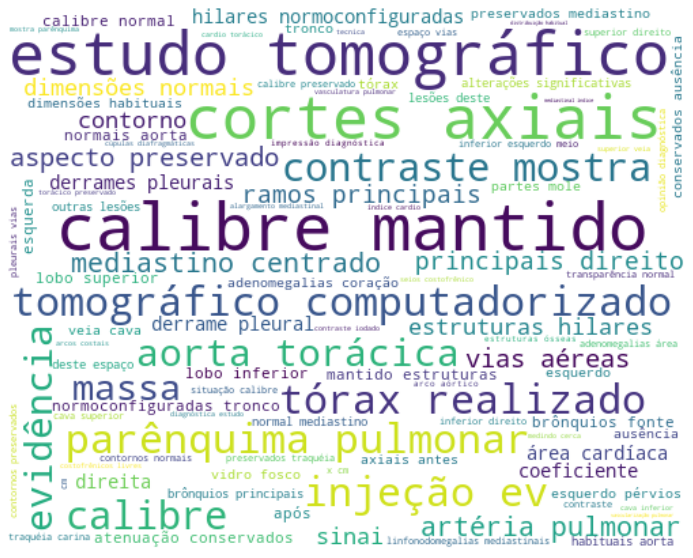

In [10]:
wordcloud = WordCloud(max_words=100, background_color="white", width=500, height=400, stopwords=stopwords).generate(text)

plt.figure(figsize=[15, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 # **<span style="color:##00cdff;">PRÉ-PROCESSANDO OS DADOS</span>**

In [11]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [12]:
def remove_stopwords(sentences):
    main_words = []
    for i in sentences:
        filtered_words = [sentence for sentence in i if sentence not in stopwords]
        main_words.append(filtered_words)
    return main_words

In [13]:
data_text = data.laudo_completo.values.tolist()
data_words = list(sent_to_words(data_text))
#data_words = remove_stopwords(data_words)

In [53]:
bigram = gensim.models.Phrases(data_words, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [54]:
def process_words(texts, stop_words=stopwords):
    texts_out = []
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = [[word for word in simple_preprocess(str(doc))] for doc in texts_out]    
    
    return texts

data_ready = process_words(data_words)  # processed Text Data!

In [55]:
print(data_ready[12])

['exame_laudado', 'sistema_telerradiologia', 'aquisicao_axial', 'tomografica', 'uso', 'contraste', 'volumoso_derrame_pleural', 'direita', 'componente', 'intercisural', 'moderado_esquerda', 'mediastinais', 'destacando', 'maior', 'cadeia_pre', 'carinal', 'medindo_mm', 'maiores_eixos_axiais', 'outra', 'hilar', 'esquerda', 'medindo_mm', 'menor_eixo', 'nodulo_espiculado', 'segmento_apicoposterior', 'lobo_superior_esquerdo', 'medindo_cerca', 'mm', 'maiores_eixos_axiais', 'focos_calcicos', 'excentricos', 'permeio', 'associam', 'nodulos', 'satelites', 'maioria', 'contornos', 'tambem', 'irregulares', 'lobo_superior', 'maior_medindo_cerca', 'mm', 'base_pleural', 'anterior', 'sinais', 'enfisema_centrolobular', 'predominante', 'campos_pulmonares_superiores', 'padrao', 'reticulado', 'segmentos', 'anteriores', 'lobos_superiores', 'lobo_medio_lingula', 'areas', 'vidro_fosco', 'focos_consolidativos', 'associados', 'podendo_estar', 'relacionada', 'pneumopatia', 'intesticial', 'nao', 'especifica', 'opac

 # **<span style="color:##00cdff;">CRIAÇÃO DO MODELO</span>**

In [76]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

id2word.filter_extremes(no_above=0.5)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [77]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [78]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=40, step=4)

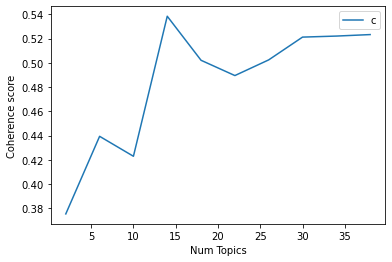

In [79]:
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [80]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3753
Num Topics = 6  has Coherence Value of 0.4393
Num Topics = 10  has Coherence Value of 0.4229
Num Topics = 14  has Coherence Value of 0.5385
Num Topics = 18  has Coherence Value of 0.5021
Num Topics = 22  has Coherence Value of 0.4895
Num Topics = 26  has Coherence Value of 0.5024
Num Topics = 30  has Coherence Value of 0.5212
Num Topics = 34  has Coherence Value of 0.5221
Num Topics = 38  has Coherence Value of 0.5233


In [81]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=6,
    iterations=1000,
    random_state=100,
    chunksize=500,
    passes=50,
    alpha=0.01,
    eta=0.9)

pprint(lda_model.print_topics())

[(0,
  '0.025*"situacao_calibre" + 0.018*"tronco_pulmonar" + 0.018*"ausencia" + '
  '0.015*"cava_superior_veia_cava" + 0.015*"inferior_aorta" + 0.014*"sinais" + '
  '0.012*"calibre_contornos" + 0.011*"contornos_preservados" + '
  '0.011*"contornos_normais" + 0.011*"preservados_coracao"'),
 (1,
  '0.034*"calibre_normal" + 0.033*"tecnica_estudo_tomografico_computadorizado" '
  '+ 0.030*"traqueia_bronquios_fonte" + 0.030*"massas" + 0.029*"evidencias" + '
  '0.029*"dimensoes_habituais_aorta_toracica" + '
  '0.028*"arteria_pulmonar_ramos_principais" + '
  '0.028*"calibre_aspecto_preservados" + 0.028*"tronco" + '
  '0.028*"mediastino_centrado"'),
 (2,
  '0.016*"direita" + 0.016*"esquerda" + 0.010*"parenquima_pulmonar" + '
  '0.009*"estudo_tomografico_computadorizado" + 0.009*"ausencia" + '
  '0.008*"fratura" + 0.008*"calibre_preservado" + 0.007*"cortes_axiais" + '
  '0.007*"derrame_pleural" + 0.007*"nao"'),
 (3,
  '0.034*"estudo_tomografico_computadorizado" + '
  '0.033*"calibre_aspecto_pres

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

C:\Users\Taynara\AppData\Local\Temp/ipykernel_8048/2553078183.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


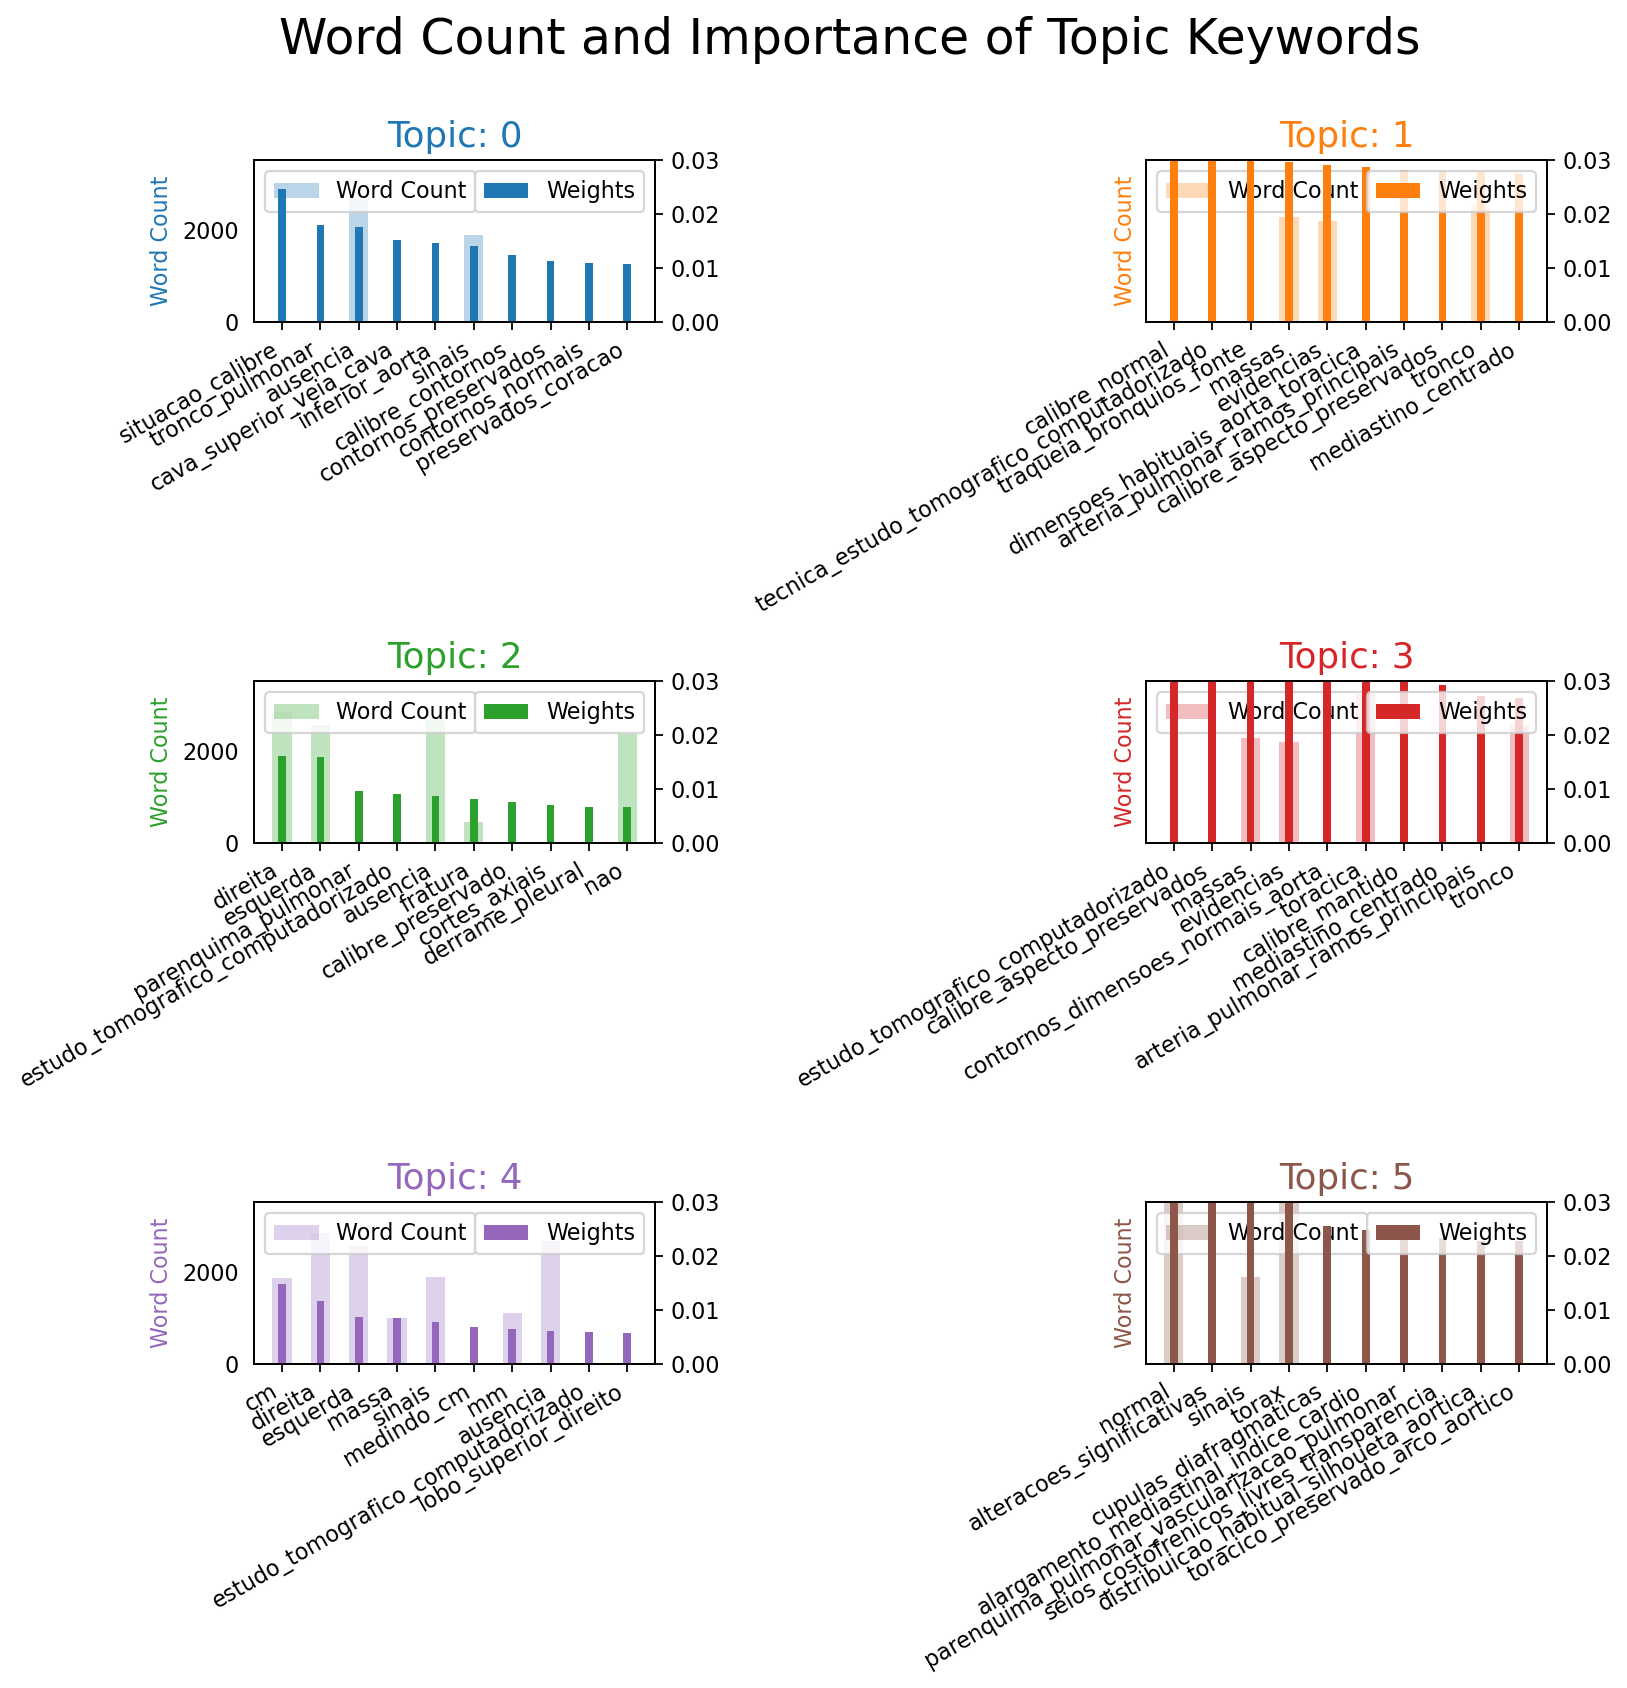

In [82]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(10,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

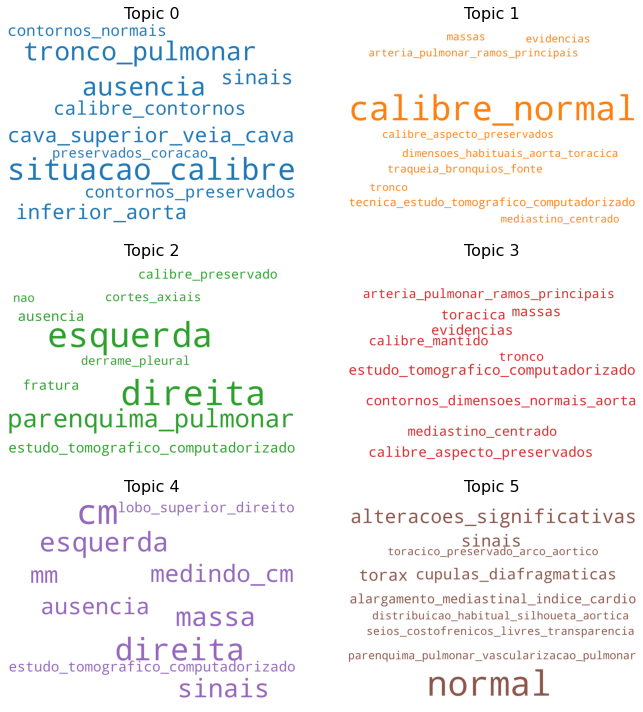

In [83]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [86]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9981,"estudo_tomografico_computadorizado, calibre_as...","[estudo, tomografico, computadorizado, do, tor..."
1,1,0.0,0.5449,"situacao_calibre, tronco_pulmonar, ausencia, c...","[realizados, cortes, tomograficos, axiais, com..."
2,2,1.0,0.6909,"calibre_normal, tecnica_estudo_tomografico_com...","[tecnica, estudo, tomografico, computadorizado..."
3,3,3.0,0.5612,"estudo_tomografico_computadorizado, calibre_as...","[estudo, tomografico, computadorizado, do, tor..."
4,4,0.0,0.9992,"situacao_calibre, tronco_pulmonar, ausencia, c...","[realizada, tomografia, computadorizada, do, t..."
5,5,4.0,0.6815,"cm, direita, esquerda, massa, sinais, medindo_...","[estudo, tomografico, computadorizado, do, tor..."
6,6,3.0,0.9985,"estudo_tomografico_computadorizado, calibre_as...","[estudo, tomografico, computadorizado, do, tor..."
7,7,2.0,0.5996,"direita, esquerda, parenquima_pulmonar, estudo...","[exame, laudado, no, sistema, de, telerradiolo..."
8,8,2.0,0.9986,"direita, esquerda, parenquima_pulmonar, estudo...","[aquisicao, com, cortes, axiais, reformatacoes..."
9,9,4.0,0.6518,"cm, direita, esquerda, massa, sinais, medindo_...","[estudo, tomografico, computadorizado, do, tor..."


In [87]:
df_dominant_topic['Dominant_Topic'].value_counts()

3.0    1052
5.0     984
4.0     974
2.0     754
1.0     731
0.0     505
Name: Dominant_Topic, dtype: int64

In [90]:
data['laudo_completo'][3000]

'transparência normal do parênquima pulmonar.  \n distribuição usual da vasculatura pulmonar.  \n seios costo  cardiofrênicos e cúpulas frênicas livres  \n área cardíaca normal.  \n aorta \n  botão aórtico e regiões hilares normais.  \n não há evidência de gânglios mediastinais e ou hilares radiologicamente detectáveis.  \n arcabouço costal sem anormalidades.  \n \t  \n opinião diagnóstica:    \n aspecto radiológico normal do tórax.'

In [92]:
amostra = []
for a in data['laudo_completo'].values:
    if 'opinião diagnóstica' in  a:
        print(a)
        amostra.append(a)
        print('-----------------')

o estudo tomográfico computadorizado do tórax 
  realizado com cortes axiais de alta resolução sem a injeção ev de contraste 
  mostra:  
 espessamento intersticial difuso bilateral 
  associado a opacidades com padrão em vidro-fosco. 
 ausência de derrames pleurais ou outras lesões deste espaço. 
 vias aéreas de calibre e aspecto preservados.  
 mediastino centrado 
  sem evidências de massas ou adenomegalias. 
 coração de contornos e dimensões normais. 
 aorta torácica de calibre mantido. 
 estruturas hilares normoconfiguradas. 
 tronco da artéria pulmonar e ramos principais 
  direito e esquerdo 
  pérvios 
  de calibre mantido. 
 opinião diagnóstica 
 sinais compatíveis com pneumopatia intersticial.
-----------------
o estudo tomográfico computadorizado do tórax 
  realizado com cortes axiais 
  antes e após o uso venoso do meio de contraste 
  mostra:  
 micropacidades acinares coalescentes 
  algumas das quais configurando macropacidades consolidativas esparsas aleatoriamente em 

In [93]:
len(amostra)

571

In [98]:
data['laudo_completo'][10]

'estudo tomográfico computadorizado do tórax \n  realizado em aparelho multislice \n  com cortes axiais \n  antes e após a injeção iv de contraste iodado. \n achados: \n opacidades nodulares com densidade de partes moles à esquerda (lobo superior e segmento superior do lobo inferior) \n  com contornos algo irregulares \n  a maior no segmento apico-posterior \n  medindo cerca de 2 \n 2 cm \n  de aspecto inespecífico. \n observam-se discretas aparentes falhas de enchimentos luminais em ramos segmentares do lobo superior esquerdo \n  adjacente a opacidade nodular supracitada \n  podendo corresponder a tep redução do calibre. \n tronco da pulmonar e demais ramos preservados. \n múltiplas opacidades micronodulares centroacinares confluentes \n  conferindo aspecto de árvore em brotamento \n  bilaterais \n  predominando nos campos superiores \n  notadamente no lobo superior esquerdo \n  onde há discreta redução volumétrica de aspecto retrátil \n  e bronquiectasias e bronquiolectasias de traçã

In [104]:
amostra1 = []
for b in data['laudo_completo'].values:
    if 'cisto'.lower() in  b:
        print(b)
        amostra.append(b)
        print('-----------------')

o estudo tomográfico computadorizado do tórax 
  realizado com cortes axiais 
  sem a injeção ev de contraste 
  mostra:  
 avaliação das estruturas mediastinais e diferenciação entre derrame empiema pleural prejudicada decorrente da não administração venosa do meio de contraste (à pedido médico solicitante). 
 dentro das condições técnicas possíveis evidenciamos: 
 hiperinsuflação pulmonar difusa. 
 consolidação com broncogramas aéreos e redução volumétrica segmentar basal posterior 
  anterior e lateral do lid associado a mínima coleção pleural laminar basal suprajacente. 
 nódulo subpleural lateral do lm medindo 05mm de natureza indeterminada. 
 cisto pulmonar medindo 13mm no segmento anterior do lsd. 
 tênues micropacidades subpleurais basal posterior do lie (diferencial para opacidades decúbito dependentes). 
 restante do parênquima pulmonar com coeficientes de atenuação conservados. 
 ausência de coleção pleural à esquerda. 
 traquéia distal e brônquios fontes calibre e aspecto p